$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cD {\mathcal{D}}$
$\def \cW {\mathcal{W}}$
$\def \cM {\mathcal{M}}$
$\def \bc {\mathbf{c}}$
$\def \bv {\mathbf{v}}$
$\def \bG {\mathbf{G}}$
$\def \bc {\mathbf{c}}$
$\def \bx {\mathbf{x}}$
$\def \by {\mathbf{y}}$
$\def \bu {\mathbf{u}}$
$\def \bv {\mathbf{v}}$
$\def \bw {\mathbf{w}}$
$\def \bG {\mathbf{G}}$
$\def \bC {\mathbf{C}}$
$\def \bD {\mathbf{D}}$
$\def \bI {\mathbf{I}}$
$\def \bP {\mathbf{P}}$
$\def \bQ {\mathbf{Q}}$
$\def \bR {\mathbf{R}}$
$\def \bS {\mathbf{S}}$
$\def \bT {\mathbf{T}}$
$\def \bU {\mathbf{U}}$
$\def \bV {\mathbf{V}}$
$\def \bW {\mathbf{W}}$
$\def \bPhi {\mathbf{\Phi}}$
$\def \bPsi {\mathbf{\Psi}}$
$\def \bGamma {\mathbf{\Gamma}}$
$\def \bSigma {\mathbf{\Sigma}}$
$\def \bTheta {\mathbf{\Theta}}$
$\def \bOmega {\mathbf{\Omega}}$
$\def \bbE {\mathbb{E}}$
$\def \bbP {\mathbb{P}}$
$\def \bbR {\mathbb{R}}$
$\def \bbN {\mathbb{N}}$

# Why do the greedy results fail?

Note that all the calculations have been offloaded to a heavy weight script: ```scripts/greedy_Vn/07_greedy_Vn_average_cases.py```. Here we simply import the results from this script. For more information on the greedy algorithms, either see the write up or the earlier notebook ```02_greedy_Vn.ipynb```

### Here we examine the "Pure Greedy" algorithm that does not adapt to any measurement

Given the dictionary $\cD$ we chose
$$
\phi_1 = {\arg\max}_{v\in\cD} \| v \|
$$
and given $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$, our next choice is
$$
\phi_{n+1} = {\arg\max}_{v\in\cD} \| v - P_{V_n} v \|
$$

** I really think this is something interesting to try and nail for Banff. Interesting work in progress, and really it's only me that has the ability or the interest to investigate this **

For example - look at the selected individuals from the greedy, and look at their existence on the fringe of what most dict elements already have, and how there is not "much in common" with 99% of random realisations, hence contravening the accepted logic

Also consider what might be interesting in terms of Kolmogorov n-Width results vs PCA / best estimator / least squares distance

### Thought after MoRePaS poster session:

Basically although we choose $\varphi_n$ to be the furthest from $V_{n-1}$, i.e. the residual $\| \varphi_n - P_{V_{n-1}} \varphi_n\|$ is maximised, it just simply isn't the case that this choice really represents 

$$
\mathbb{E}_\nu ( \| v - P_{V_{n-1}} v \|_V ) = 
\int_U \| u(a) - P_{V_{n-1}} u(a) \|_V \, \mathrm{d} \mu(a)
\int_V \| v - P_{V_{n-1}} v \|_V \, \mathrm{d} \nu(v)
$$

where $\nu(v) = \mu(u^{-1}(v))$ is the push forward measure, assuming $u$ is continuous and bijective.

### Testing the greedy algorithm

So - perhaps in a sense what we want is to see which SVD components are within the chosen greedy measurements, and how far "down" the singular vectors we have gone. What does this mean? We can give the likelihood of the greedily chosen vectors in some sense from the SVD of that map.

Also compare the convergence of the residual to the convergence of the singular values. This may yeild something interesting. To do this though, we need to have an orthogonal representation in either basis, multivariate Legendre for the $Y$ space, and some surmised ortho-normal basis on $V$.

Well, we could do that, or just trust the convergence of the PCA basis in $V$ that we get from lots and lots of snapshots $u(y_i)$.

A heirarchical hat basis that is then orthonormalised in $V$ could be a good contender, making sure to apply the Gram-Schmidt process down the heirarchy of scales. One thing to note though - 

### Some notes from the MoRePaS conference

People really are banging on about Kolmogorov $N$-widths as the real be-all end-all of measuring the appropriateness of linear approximation methods. Is this accurate? Stephen Rave seems to think that it's really important, before going on to non-linear approx because of this in a particular case. THink about this.

See Daniel Kressner's talk on low-rank tensors in reduced basis methods. Really interesting. Also 

Also Hackbusch/Kuhn 2009

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

results_file = '../../scripts/greedy_Vn/results/07_greedy_Vn_stats.npy'
stats = np.load(results_file)

### Run this little snippet to see a plot of the basis vectors from the plain greedy basis

...to get a sense of how crazy they are.

In [ ]:
g = pat.PWBasis(file_name = "../../scripts/greedy_Vn/results/PlainGreedy_Basis.npz")
r = pat.PWBasis(file_name = "../../scripts/greedy_Vn/results/Reduced_Basis.npz")
p = pat.PWBasis(file_name = "../../scripts/greedy_Vn/results/PCA_Basis.npz")

fig = plt.figure(figsize=(15, 15))
for i, v in enumerate(g.vecs[:16]):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    v.plot(ax)
fig.savefig('GreedyPlots.pdf')
plt.show()


fig = plt.figure(figsize=(15, 15))
for i, v in enumerate(r.vecs[:16]):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    v.plot(ax)
fig.savefig('ReducedBasisPlots.pdf')
plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


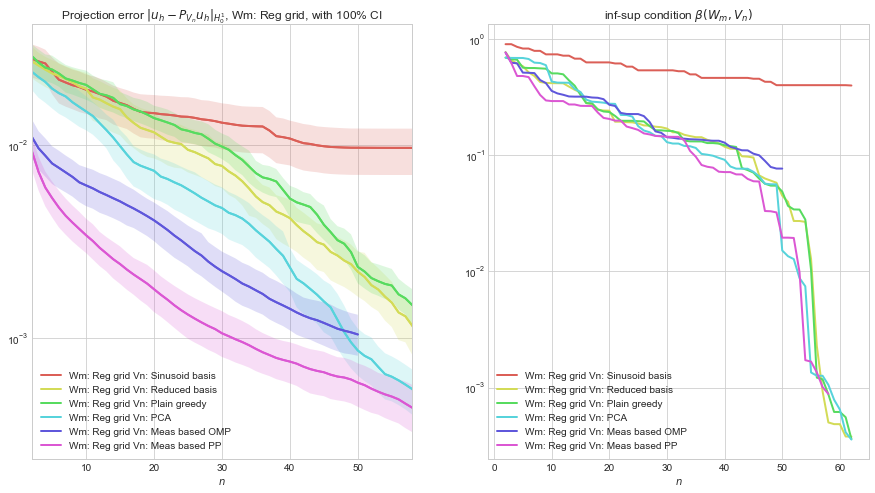

In [4]:
generic_Vns_labels = ['Sinusoid basis', 'Reduced basis', 'Plain greedy', 'PCA']
adapted_Vns_labels = ['Meas based OMP', 'Meas based PP']
Wm_labels = ['Reg grid', 'Random']

sns.set_palette('hls', len(generic_Vns_labels) + len(adapted_Vns_labels))
cp = sns.color_palette()
sns.set_style('whitegrid')

lss = ['-', '--']
lws = [2,1]

axs = []
fig = plt.figure(figsize=(15, 8))
axs.append(fig.add_subplot(1, 2, 1, title='Projection error $\| u_h - P_{V_n} u_h \|_{H_0^1}$, Wm: Reg grid, with 100% CI'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(1, 2, 2, title=r'inf-sup condition $\beta(W_m, V_n)$'))
axs[-1].set(yscale="log", xlabel='$n$')

i = 0
Wm_label = Wm_labels[0]
for j, Vn_label in enumerate(generic_Vns_labels):

    Vn_n = np.where(np.isclose((~np.isclose(stats[0, i, j, :, :], 0.0)).sum(axis=0), stats.shape[3]))[-1][-1]

    label = 'Wm: ' + Wm_label + ' Vn: ' + Vn_label

    plt.sca(axs[0])
    sns.tsplot(stats[1, i, j, :, 2:Vn_n], range(2, Vn_n), ls=lss[i], lw=lws[i],color=cp[j], ci=[100])
    plt.plot(range(2, Vn_n), stats[1, i, j, :, 2:Vn_n].mean(axis=0), label=label, ls=lss[i], lw=lws[i], color=cp[j])
    plt.legend(loc=3)

    plt.sca(axs[1])
    plt.plot(range(2, Vn_n), stats[2, i, j, 0, 2:Vn_n], lss[i], label=label, lw=lws[i], color=cp[j])
    plt.legend(loc=3)

for j_i, Vn_label in enumerate(adapted_Vns_labels):
    j = j_i + len(generic_Vns_labels)

    label = 'Wm: ' + Wm_label + ' Vn: ' + Vn_label

    Vn_n = np.where(np.isclose((~np.isclose(stats[0, i, j, :, :], 0.0)).sum(axis=0), stats.shape[3]))[-1][-1]

    plt.sca(axs[0])
    sns.tsplot(stats[1, i, j, :, 2:Vn_n], range(2, Vn_n), ls=lss[i], lw=lws[i], color=cp[j], ci=[100])
    plt.plot(range(2, Vn_n), stats[1, i, j, :, 2:Vn_n].mean(axis=0), label=label, ls=lss[i], lw=lws[i], color=cp[j])        
    plt.legend(loc=3)

    plt.sca(axs[1])
    plt.plot(range(2, Vn_n), stats[2, i, j, 0, 2:Vn_n], lss[i], label=label, lw=lws[i], color=cp[j])
    plt.legend(loc=3)

plt.show()

Damn, lost some notes. No matter, we have $u\in \cM$ and we want to find
$$
\bbP_v \left ( \langle v, C^{-1} v \rangle \ge \langle u, C^{-1} u \rangle \right)
$$
where our approx is
$$
\langle v, C v \rangle = \frac 1 N \sum_{i=1}^N \left|\langle u_i, v \rangle_V \right|^2
$$
and as we have $C = U U^* = \Phi \bSigma^2 \Phi^*$ where $(\Phi^* v)_i = \langle \varphi_i, v \rangle_V$. Now for any $v\in \mathrm{span}(\varphi_1,\ldots)$, the matched normal probability distribution is going to be (now truncating to $N$ singular vectors because otherwise it makes no sense)

$$
p(v) = (2\pi)^{-N/2} \prod_{i=1}^N \sigma_i^{-1} \exp \left(-\frac{\left | \langle v, C^{-1} v \rangle_V \right |^2 }{2}\right) = (2\pi)^{-N/2} \prod_{i=1}^N \sigma_i^{-1} \exp \left(- \sum_{i\ge 1} \frac{ \left | \langle \varphi_i, v \rangle_V  \right |^2}{2\sigma_i^2}\right)
$$

So - in the end what it means is that $\frac{\langle \varphi_i, v \rangle}{\sigma_i^2}$ should be roughly flat, and that the likelihood, for example, of finding anything less likely than $\phi_i^G$, the greedy basis element, will be

$$
\bbP_v \left ( \langle v, C^{-1} v \rangle \ge \langle \varphi_i^G C^{-1} \varphi_i^G \rangle \right)
= \prod_{i=1}^N \left(1 -  \mathrm{erf} \left(\frac{ \left | \langle \varphi_i, v \rangle_V \right|^2 }{2\sigma_i^2}\right)\right)
$$


In [ ]:
p.dot(g.vecs[0])


Plot the worst-cases to see the diff between $L_\infty$ and the the average case

In [152]:
def make_soln(points, fem_div, field_div, a_bar=1.0, c=0.5, f=1.0, verbose=False):
    
    solns = []
    fields = []

    for p in points:
        field = pat.PWConstantSqDyadicL2(a_bar + c * p.reshape((2**field_div,2**field_div)))
        fields.append(field)
        # Then the fem solver (there a faster way to do this all at once? This will be huge...
        fem_solver = pat.DyadicFEMSolver(div=fem_div, rand_field = field, f = 1)
        fem_solver.solve()
        solns.append(fem_solver.u)
        
    return solns, fields

fem_div = 7

a_bar = 1.0
c = 0.9
field_div = 2
side_n = 2**field_div

def make_PCA(N = 1e3):

    np.random.seed(1)
    dict_basis_small, dict_fields = pat.make_pw_reduced_basis(N, field_div, fem_div, a_bar=a_bar, c=c, f=1.0, verbose=False)
    dict_basis_small.make_grammian()

    cent = dict_basis_small.reconstruct(np.ones(N) / N)

    import copy

    cent_vecs = copy.deepcopy(dict_basis_small.vecs)
    for i in range(len(cent_vecs)):
        cent_vecs[i] = cent_vecs[i] - cent

    dict_basis_small_cent = pat.PWBasis(cent_vecs)
    dict_basis_small_cent.make_grammian()
    
    lam, V = sp.linalg.eigh(dict_basis_small_cent.G)
    lams = np.sqrt(lam[np.abs(lam) > 1e-10][::-1])
    n = len(lams)

    PCA_vecs = []
    for i, v in enumerate(np.flip(V.T, axis=0)[:n]):
        vec = dict_basis_small_cent.reconstruct(v)
        PCA_vecs.append(vec / lams[i])

    return pat.PWBasis(PCA_vecs), lams

In [153]:
Vn_PCA_small_dict, small_lams = make_PCA(int(1e2))
Vn_PCA_mid_dict, mid_lams = make_PCA(int(5e2))
Vn_PCA_big_dict, big_lams = make_PCA(int(1e3))

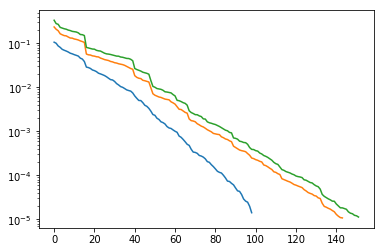

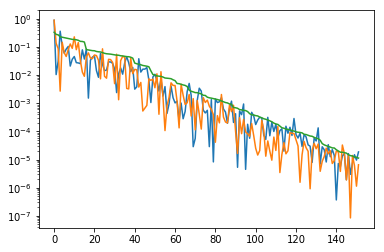

0.9999999017535723
0.9999999801871351
0.00044270560302062036
0.0001984853096674961


In [162]:
# Now plot the rep of g.vecs[0] in terms of the PCA basis...

plt.semilogy(small_lams)
plt.semilogy(mid_lams)
plt.semilogy(big_lams)
plt.show()

Vn_PCA = Vn_PCA_big_dict
lams = big_lams
n = Vn_PCA.n

plt.semilogy(np.abs(Vn_PCA.dot(g.vecs[0]/g.vecs[0].norm())))
plt.semilogy(np.abs(Vn_PCA.dot(r.vecs[0]/r.vecs[0].norm())))
#plt.semilogy(np.abs(Vn_PCA.dot(g.vecs[1]/g.vecs[1].norm())))
#plt.semilogy(np.abs(Vn_PCA.dot(g.vecs[2]/g.vecs[2].norm())))
plt.semilogy(lams)
plt.show()

g_comp = Vn_PCA.dot(g.vecs[0]/g.vecs[0].norm())
r_comp = Vn_PCA.dot(r.vecs[0]/r.vecs[0].norm())

# Look at this
print(np.linalg.norm(g_comp[:3*n//4]))
print(np.linalg.norm(r_comp[:3*n//4]))
print(np.linalg.norm(g_comp[3*n//4:]))
print(np.linalg.norm(r_comp[3*n//4:]))

### Making a heirarchical hat basis for $V$

__Idea:__ try looking at the condition number of different enumerations of a hat basis in $H_0^1$. Try
 - linear fill (usual)
 - alternating fill
 - diamon fill

In [85]:
h_lev = 2 # The level the hat basis goes to

first_hat = pat.PWLinearSqDyadicH1(div = 1)
first_hat.values[1,1] = 1
first_hat = first_hat / first_hat.norm()

hat_basis = pat.PWBasis(vecs=[first_hat.interpolate(h_lev) / first_hat.norm()])

# Linear fill:
for l in range(1,h_lev):
    for i in range(2**(l+1)-1):
        for j in range(2**(l+1)-1):
            
            h = pat.PWLinearSqDyadicH1(div = l+1)
            h.values[i + 1, j + 1] = 1
            hat_basis.add_vector(h.interpolate(h_lev) / h.norm())
            
hat_basis.make_grammian()

print(np.linalg.cond(hat_basis.G))
print(hat_basis.G.shape)
print(np.linalg.matrix_rank(hat_basis.G))
print((hat_basis.vecs[0].values.shape[0]-2)**2)

5.0262944779655656e+16
(10, 10)
9
9


In [86]:
for vec in hat_basis.vecs:
    print(vec.values)

[[0.    0.    0.    0.    0.   ]
 [0.    0.125 0.25  0.125 0.   ]
 [0.    0.25  0.5   0.25  0.   ]
 [0.    0.125 0.25  0.125 0.   ]
 [0.    0.    0.    0.    0.   ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.  0.  0.  0. ]